In [57]:
%matplotlib inline
from k2utils import *
import thread
from matplotlib.colors import SymLogNorm, LogNorm
from matplotlib.pyplot import subplots_adjust

In [2]:
ccd = CCD(module=6, campaign=8, channel=2, field='FLUX')
pixmapfile = '../data/PixelMaps/Storage/PixelMaps/K2_target_pixels.hdf5'
cont = PixelMapContainer.from_hdf5(pixmapfile, ccd)
gen = PixMapGenerator(cont)

In [55]:
def download_in_background(ccd):
    with LoadingBar(True) as bar:
        cont = PixelMapContainer(ccd, bar=bar)
        cont.save(pixmapfile, doc='Pixel values are represented by the \'FLUX\' data column of the K2 target pixel files')

ccds = [CCD(module=6, campaign=8, channel=i, field='FLUX') for i in xrange(4)]
for ccd in ccds:
    try:
        cont = PixelMapContainer.from_hdf5(pixmapfile, ccd)
    except:
        print ccd
        #download_in_background(ccd)

/home/rodot/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less_equal
  # Remove the CWD from sys.path while we load stuff.


(0, 1024)

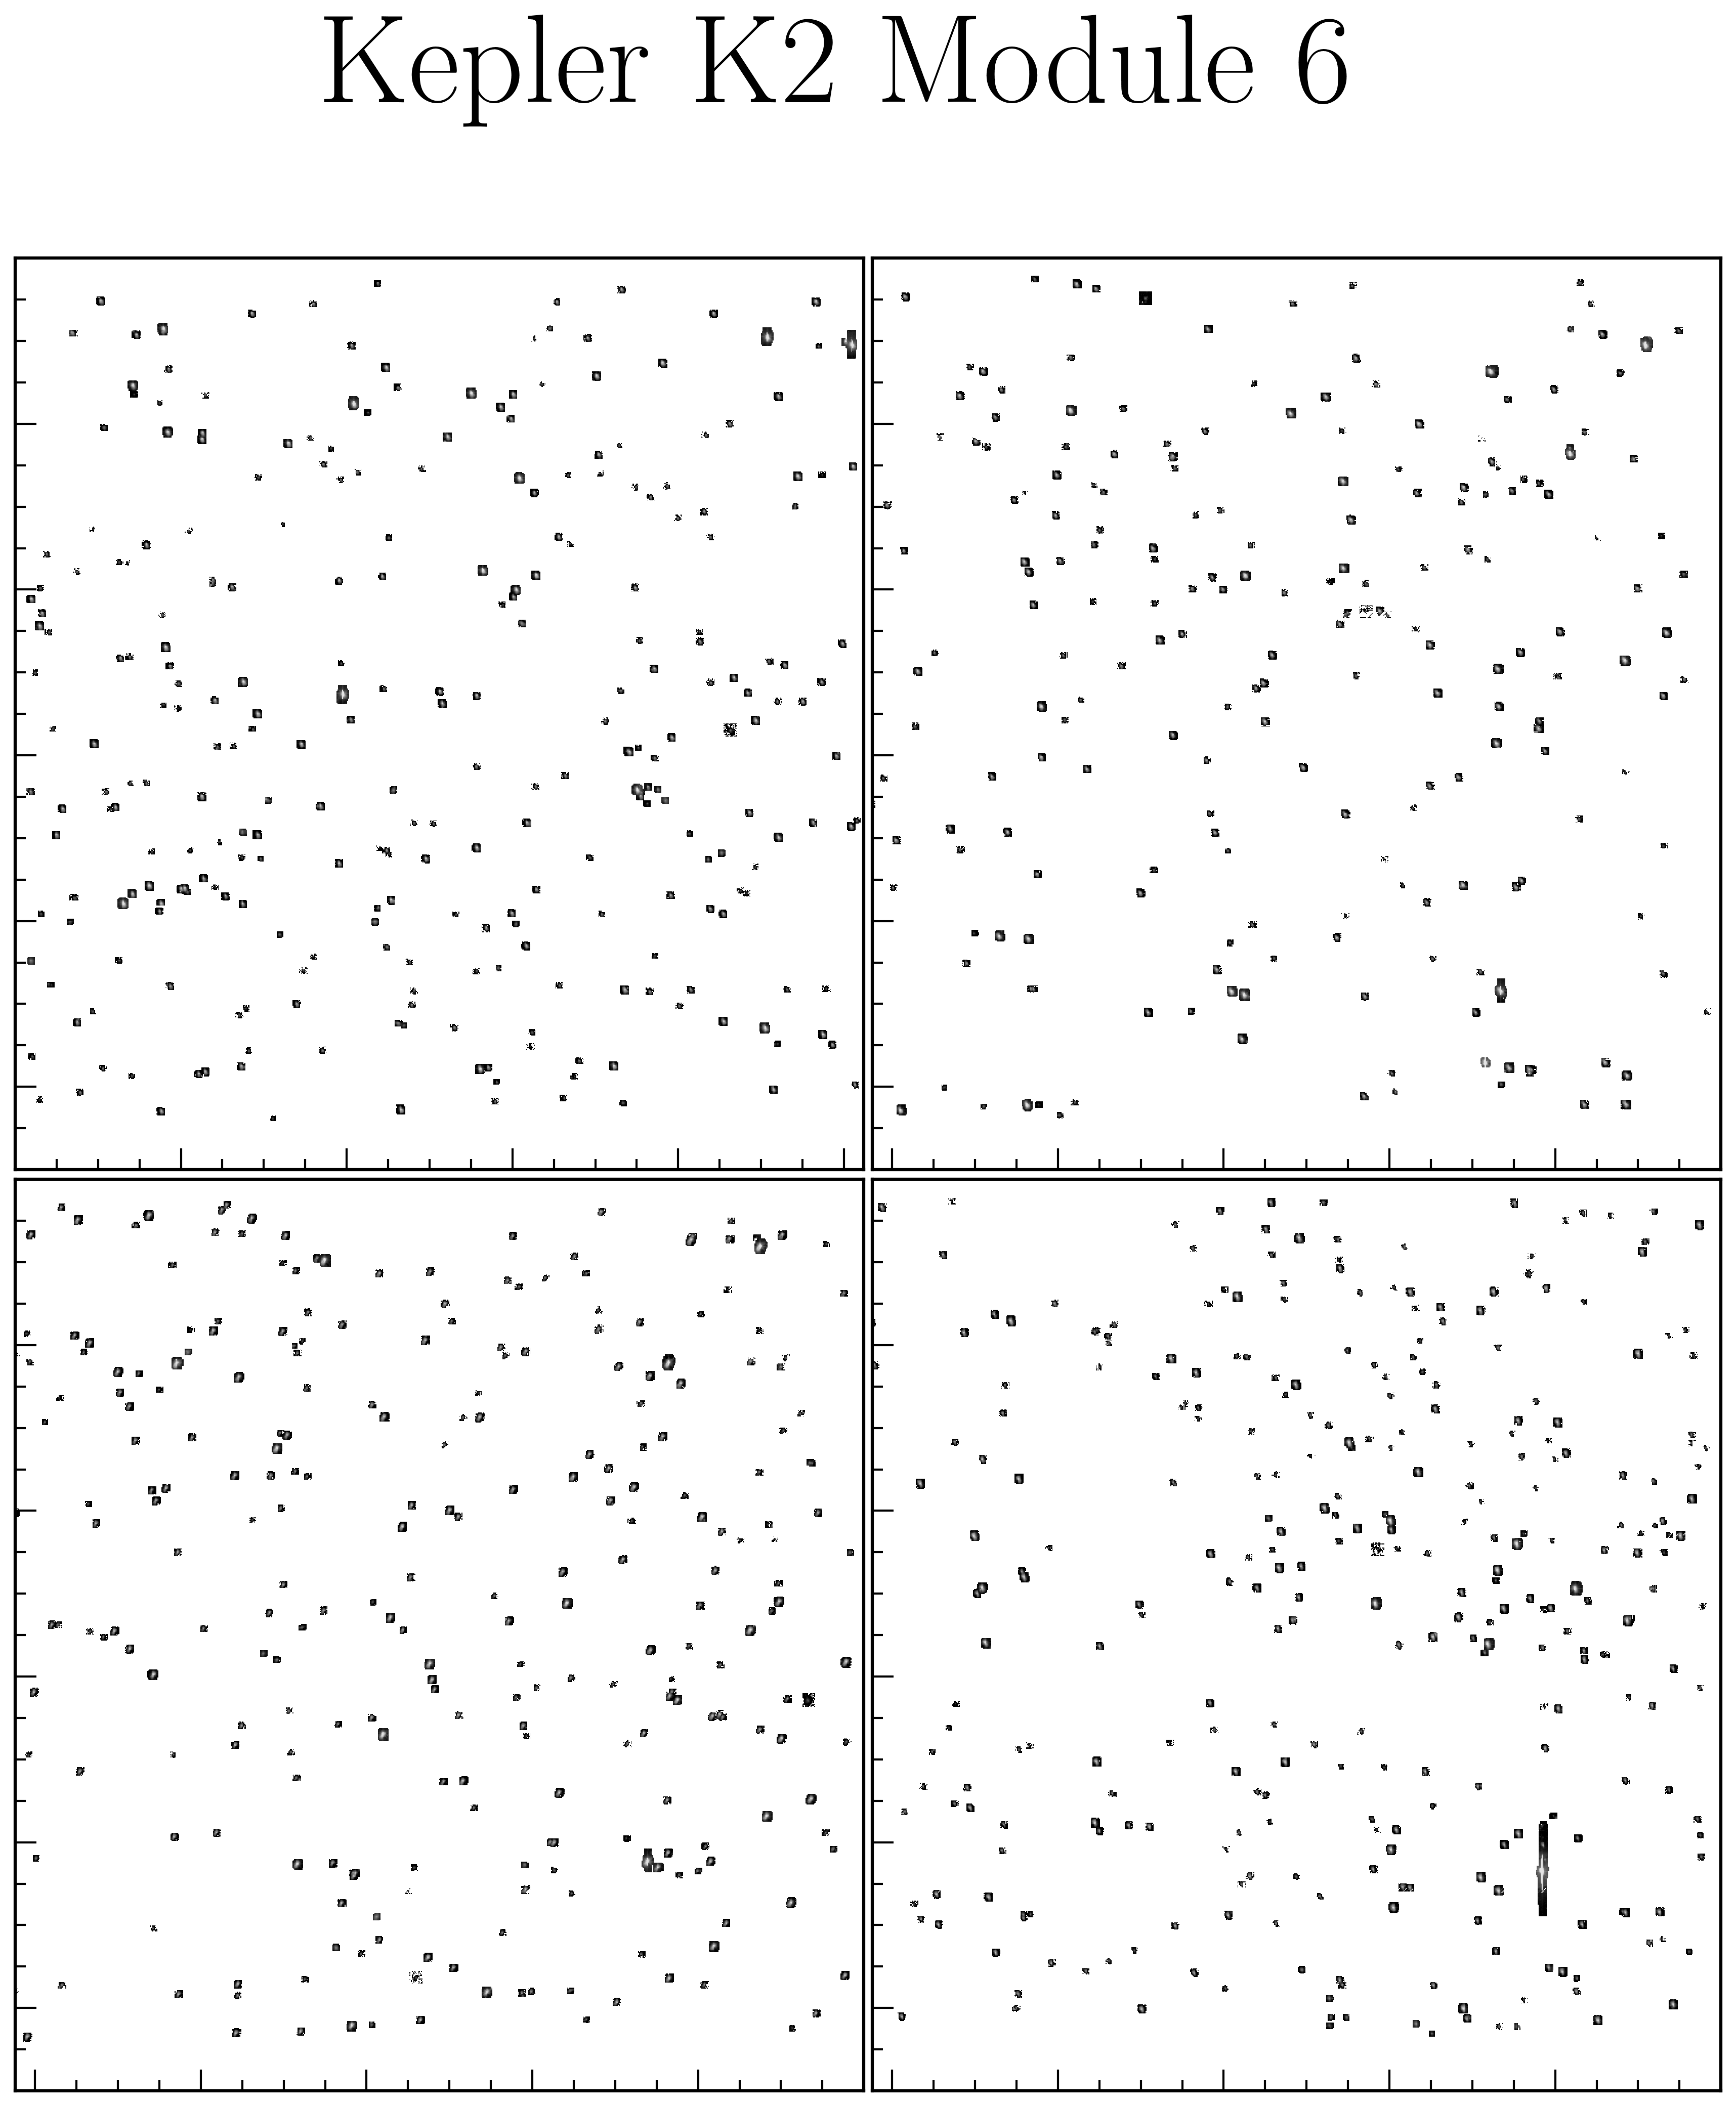

In [124]:
fig, ax = subplots(2,2, figsize=(14.5,16), dpi=300, sharex=False, sharey=False)

cmap = 'Greys_r'
#cbar_ax = fig.add_axes([0.95, 0.15, 0.05, 0.7])
fig.suptitle('Kepler K2 Module 6', fontsize=60)
for i, (a, ccd) in enumerate(zip(ax.flatten(), ccds)):
    cont = PixelMapContainer.from_hdf5(pixmapfile, ccd)
    gen = PixMapGenerator(cont, cache=False)
    img = gen[0]
    img[img <= 0] == np.nan
    norm = LogNorm(vmin=10, vmax=np.nanmax(img)*10)
    im = a.imshow(img, interpolation='none', cmap=cmap, label='Channel %i' % i, norm=norm)
    a.set_xlim(1024,0)
    a.set_ylim(1100,0)

    a.tick_params(labelbottom='off') 
    a.tick_params(labelleft='off') 
    
subplots_adjust(hspace=0.01, wspace=0.01)
ax[0][0].set_xlim(0,1024)
#cbar = fig.colorbar(im, cax=cbar_ax)
#cbar.ax.set_ylabel('Flux $(e^{-}/s)$', fontsize=40)
#for tick in cbar_ax.xaxis.get_major_ticks():
#    tick.label.set_fontsize(60) 

#for tick in cbar_ax.yaxis.get_major_ticks():
#    tick.label.set_fontsize(60) 



/home/rodot/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less_equal
  
/home/rodot/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in less_equal
/home/rodot/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in less_equal


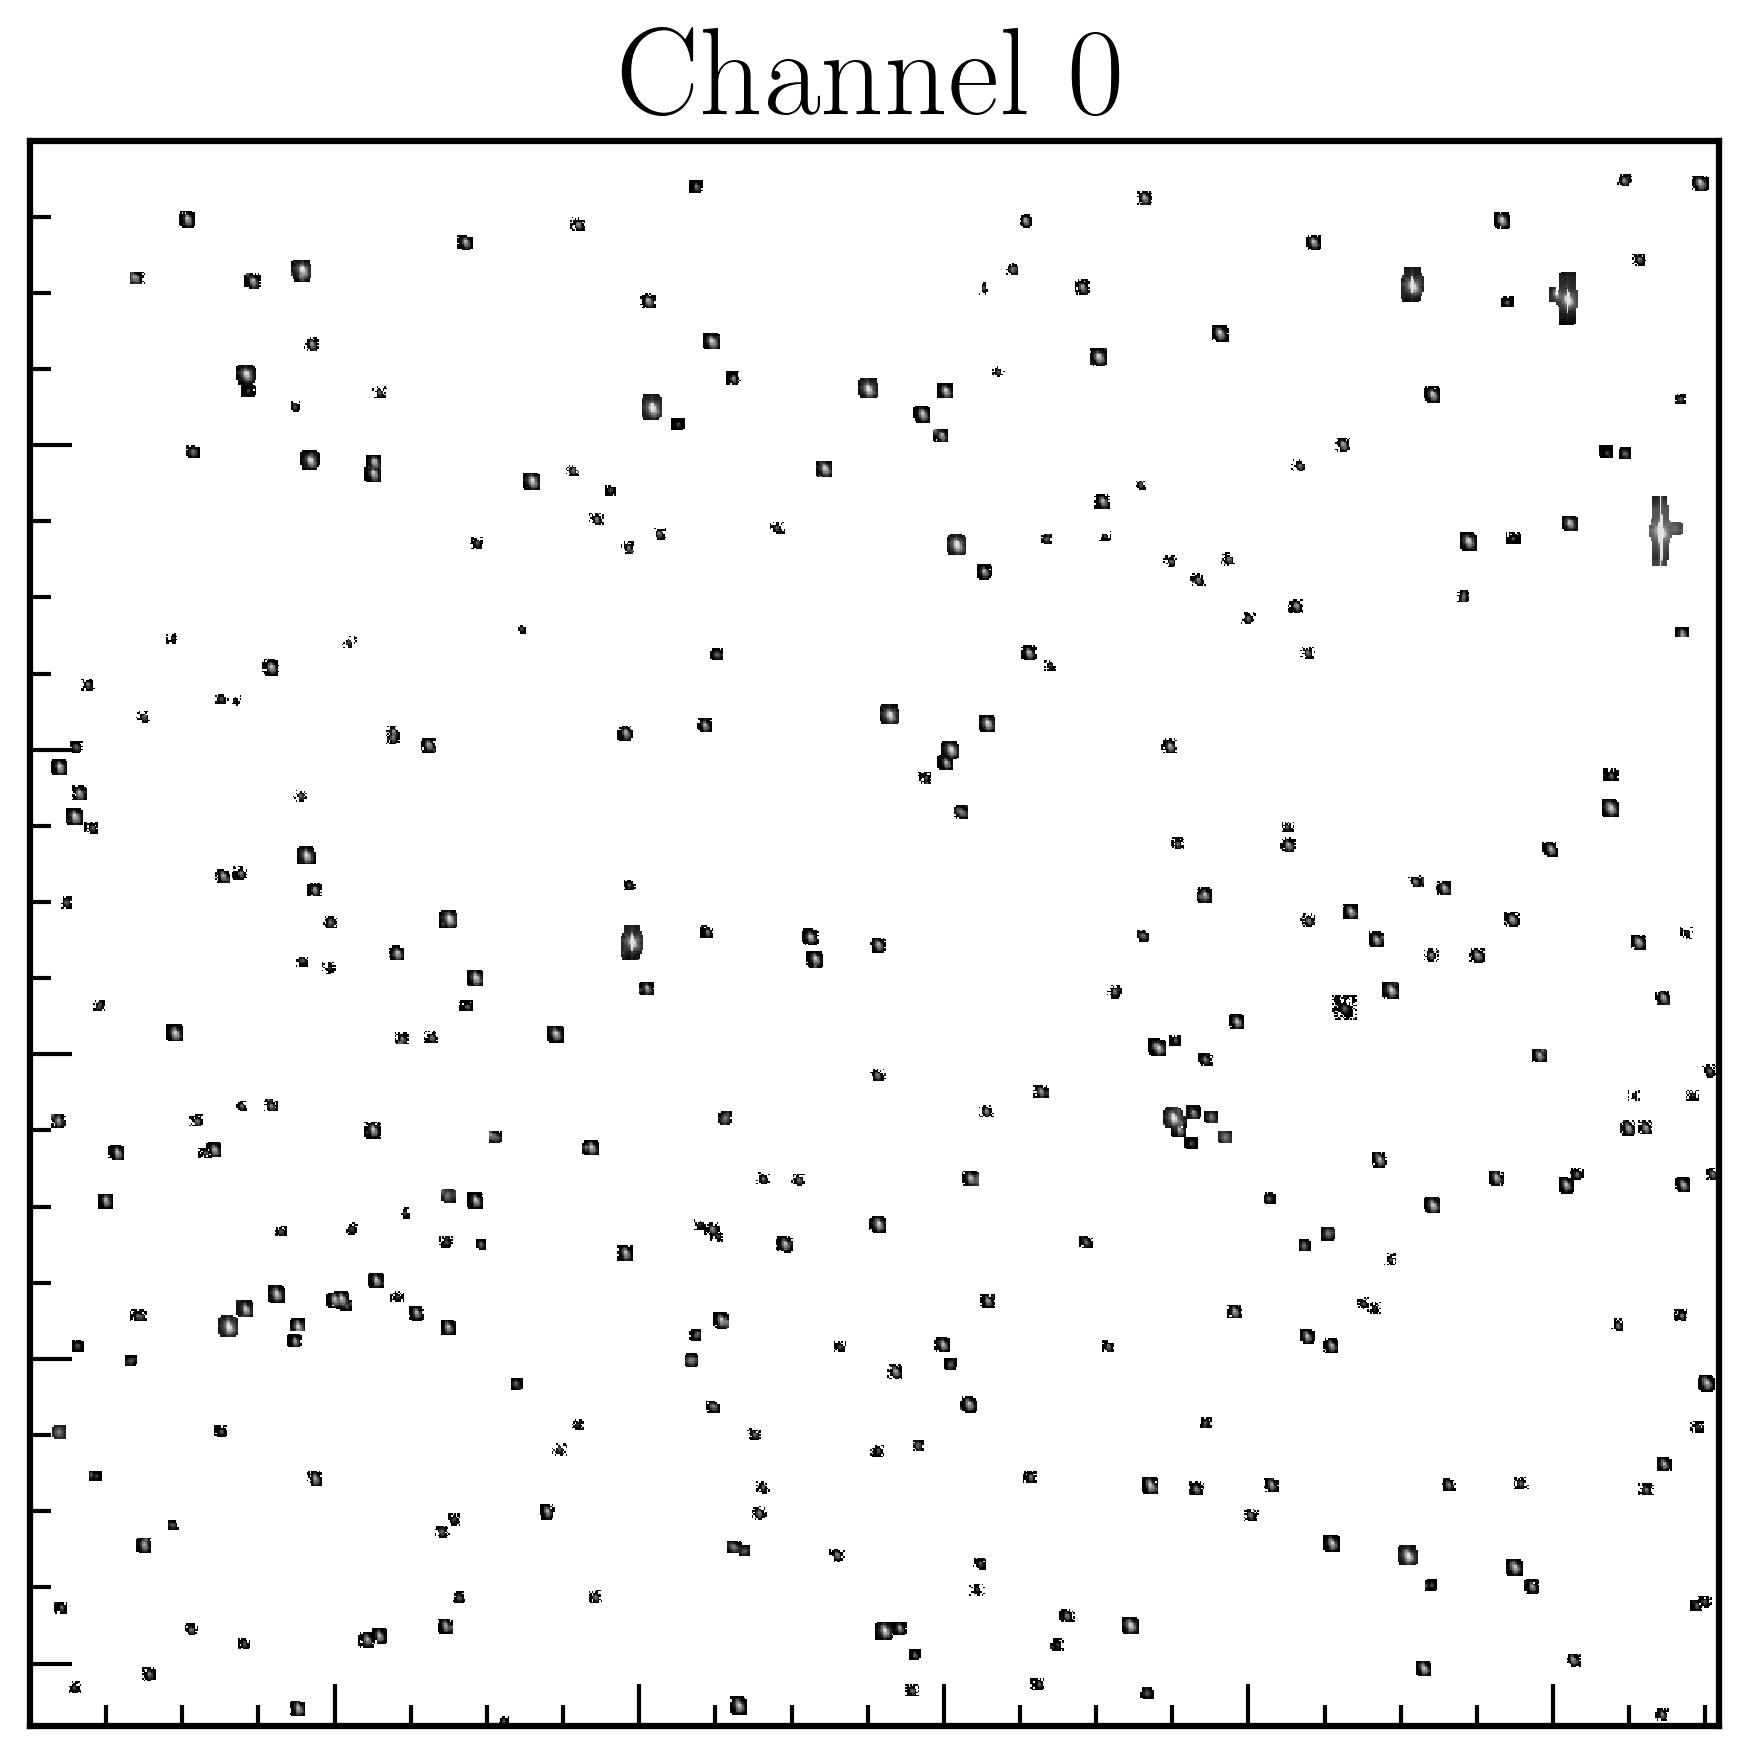

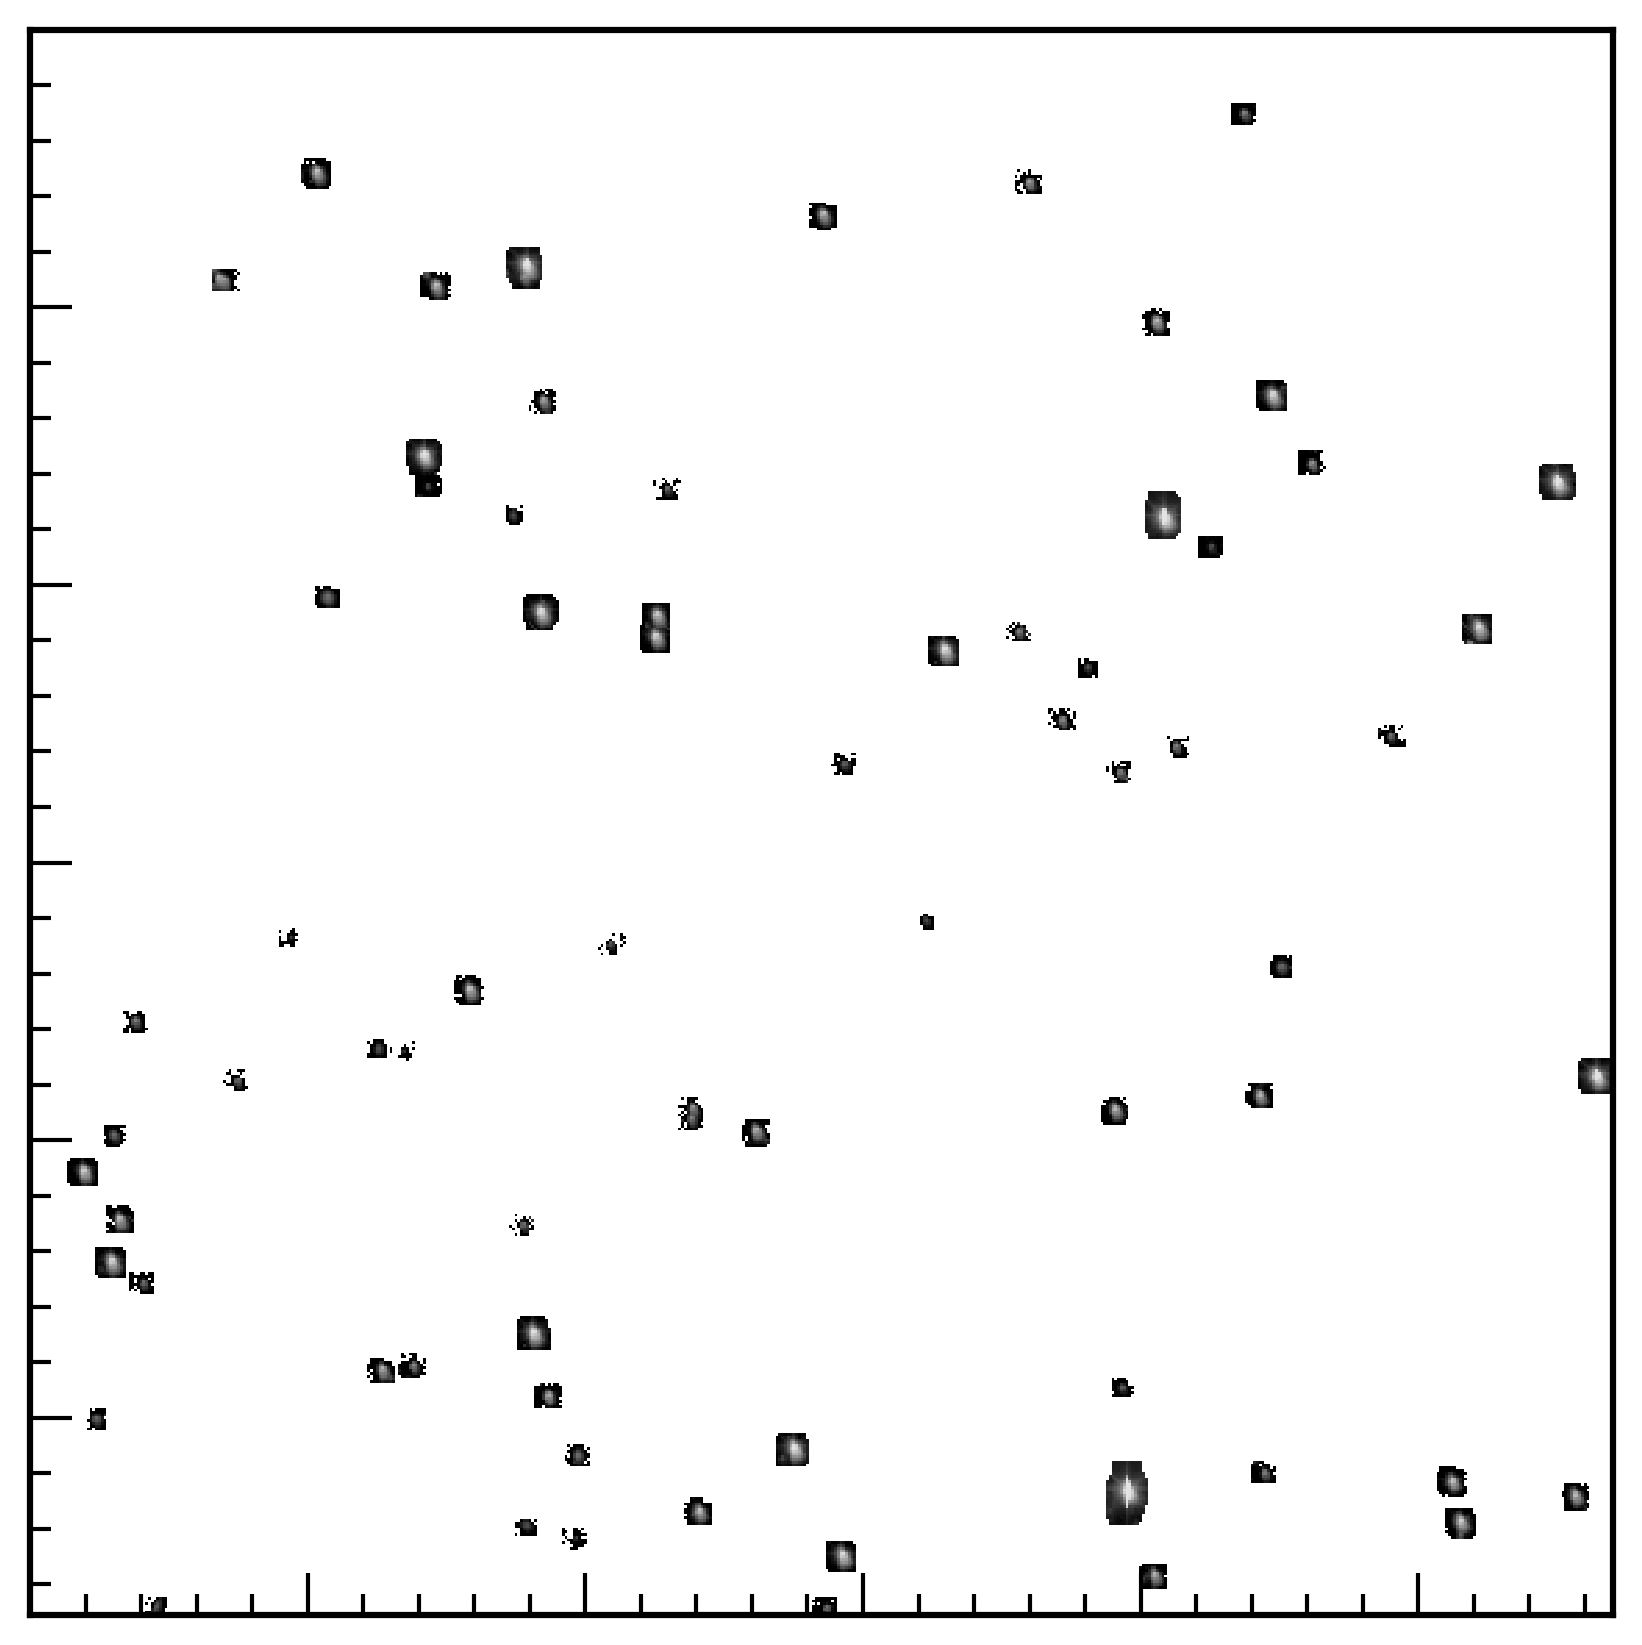

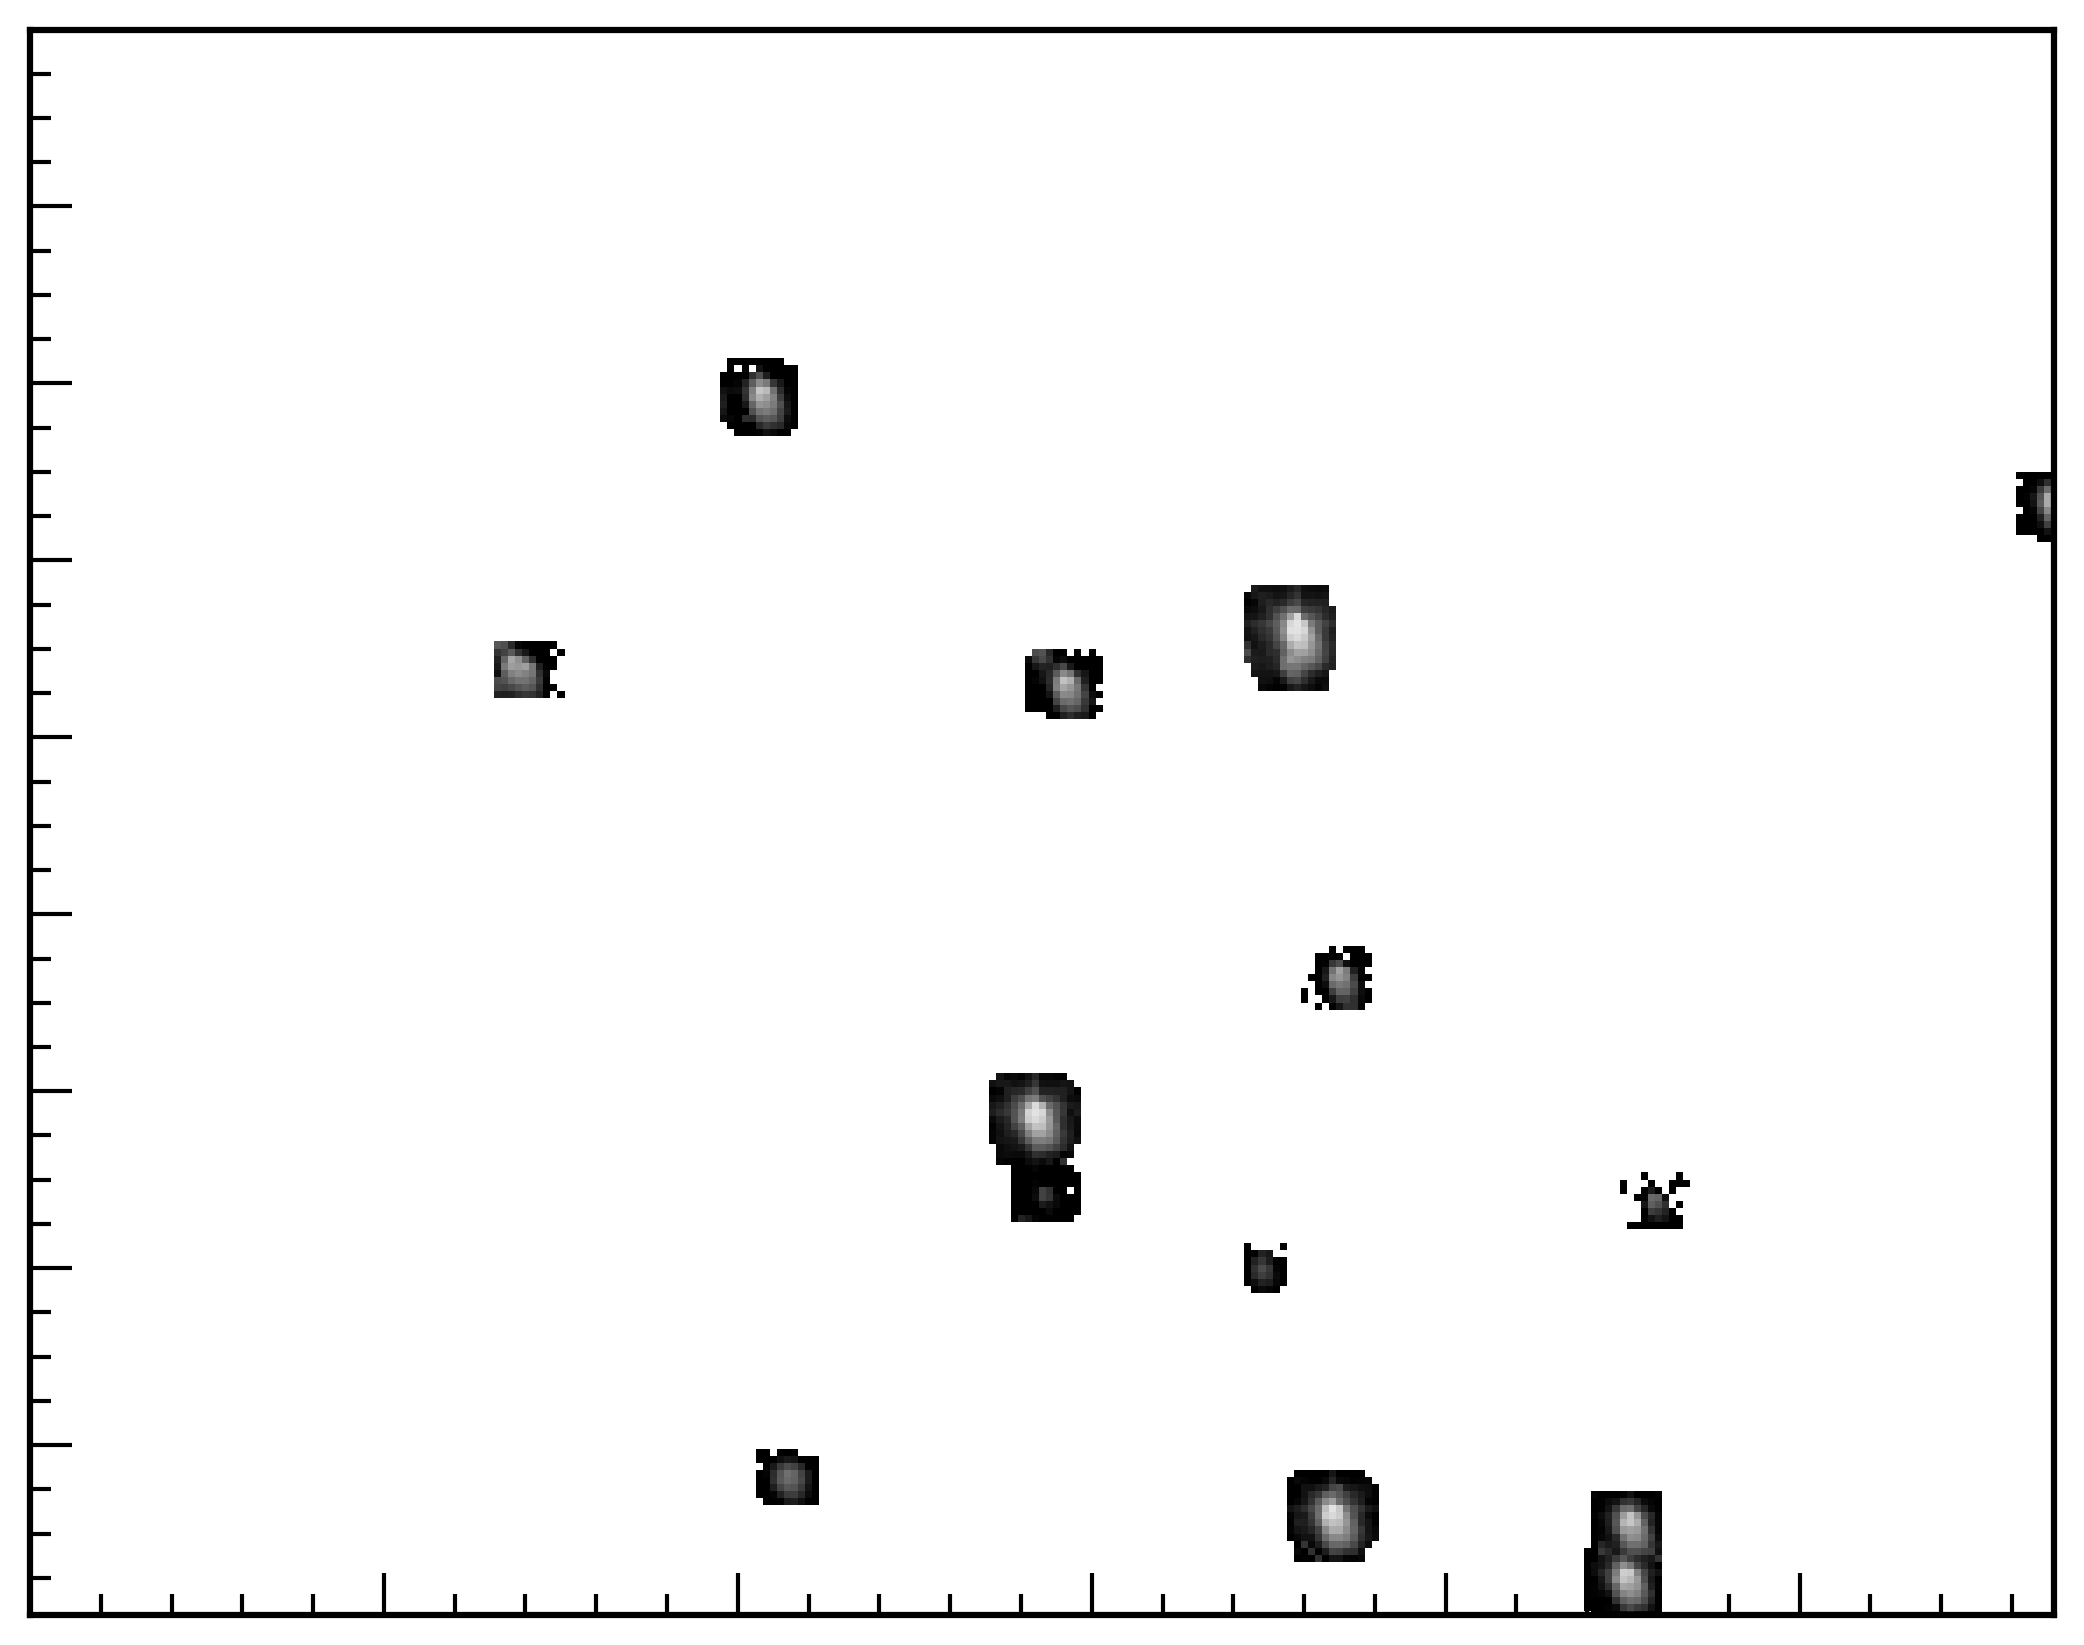

In [126]:
cont = PixelMapContainer.from_hdf5(pixmapfile, ccds[0])
gen = PixMapGenerator(cont, cache=False)

image = gen[0]
img = gen[0]
img[img <= 0] == np.nan
norm = LogNorm(vmin=10, vmax=np.nanmax(img)*10)
fig, ax = subplots(1,1, figsize=(10,7), dpi=300)
#cmap = rplot.palettable.colorbrewer.sequential.BuPu_8.mpl_colormap
cmap = rplot.palettable.cubehelix.perceptual_rainbow_16.mpl_colormap
cmap = 'Greys_r'
#norm = SymLogNorm(linthresh=0.03, linscale=0.03, vmin=-1.0, vmax=np.log10(np.nanmax(image)))
im = ax.imshow(img, interpolation='none', cmap=cmap, norm=norm)
ylim, xlim = np.max(np.where(~np.isnan(img)), axis=1)

ax.set_ylim(ylim,0)
ax.set_xlim(0,xlim)
ax.set_title('Channel 0', fontsize=30)
    
#cbar = fig.colorbar(im, ax=ax)
#cbar.ax.set_ylabel('Flux $(e^{-}/s)$', fontsize=30)
#for tick in cbar_ax.xaxis.get_major_ticks():
#    tick.label.set_fontsize(26) 

#for tick in cbar_ax.yaxis.get_major_ticks():
#    tick.label.set_fontsize(26)     
ax.tick_params(labelbottom='off') 
ax.tick_params(labelleft='off') 

###

fig, ax = subplots(1,1, figsize=(10,7), dpi=300)
img = gen[0][:575,:575]
img[img <= 0] == np.nan
norm = LogNorm(vmin=10, vmax=np.nanmax(img)*10)

im2 = ax.imshow(img, interpolation='none', cmap=cmap, norm=norm)
#cbar2 = fig.colorbar(im2, ax=ax)

ylim, xlim = np.max(np.where(~np.isnan(img)), axis=1)

ax.set_ylim(ylim,0)
ax.set_xlim(0,xlim)
#cbar2.ax.set_ylabel('Flux $(e^{-}/s)$', fontsize=30)
#for tick in cbar2.ax.xaxis.get_major_ticks():
#    tick.label.set_fontsize(26) 

#for tick in cbar2.ax.yaxis.get_major_ticks():
#    tick.label.set_fontsize(26) 
ax.tick_params(labelbottom='off') 
ax.tick_params(labelleft='off') 

####

fig, ax = subplots(1,1, figsize=(10,7), dpi=300)
img = gen[0][:575/2,:575/2]
img[img <= 0] == np.nan
norm = LogNorm(vmin=10, vmax=np.nanmax(img)*10)

im2 = ax.imshow(img, interpolation='none', cmap=cmap, norm=norm)
#cbar2 = fig.colorbar(im2, ax=ax)

ylim, xlim = np.max(np.where(~np.isnan(img)), axis=1)

ax.set_ylim(ylim,0)
ax.set_xlim(0,xlim)
#cbar2.ax.set_ylabel('Flux $(e^{-}/s)$', fontsize=30)
#for tick in cbar2.ax.xaxis.get_major_ticks():
#    tick.label.set_fontsize(26) 

#for tick in cbar2.ax.yaxis.get_major_ticks():
#    tick.label.set_fontsize(26) 
ax.tick_params(labelbottom='off') 
ax.tick_params(labelleft='off') 


    
